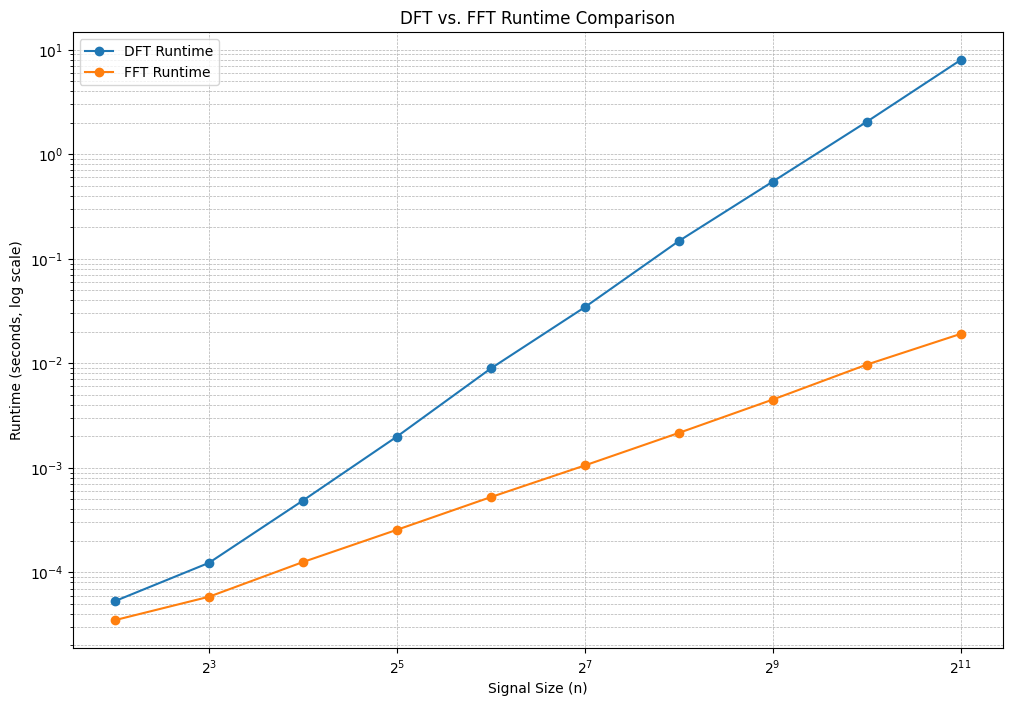

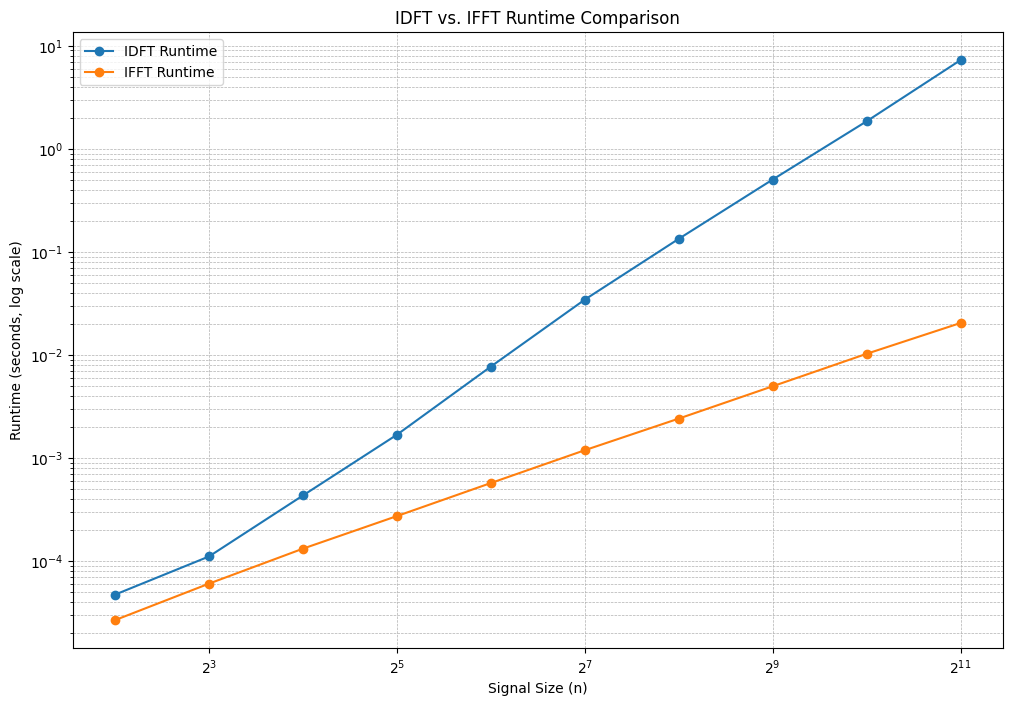

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def generate_random_signal(size):
    return np.random.rand(size)

signal_sizes = [2**k for k in range(2, 12)] 

signal_data = {size: generate_random_signal(size) for size in signal_sizes}

dft_runtimes = []
idft_runtimes = []
fft_runtimes = []
ifft_runtimes = []

num_runs = 20

def dft(signal):
    N = len(signal)
    return np.array([sum(signal[k] * np.exp(-2j * np.pi * k * n / N) for k in range(N)) for n in range(N)])

def idft(signal):
    N = len(signal)
    return np.array([sum(signal[k] * np.exp(2j * np.pi * k * n / N) for k in range(N)) for n in range(N)]) / N

def fft(signal):
    N = len(signal)
    if N <= 1:
        return signal
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for this FFT implementation.")
    even = fft(signal[::2])
    odd = fft(signal[1::2])
    terms = np.exp(-2j * np.pi * np.arange(N // 2) / N) * odd
    return np.concatenate([even + terms, even - terms])

def ifft(signal):
    N = len(signal)
    if N <= 1:
        return signal
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for this IFFT implementation.")
    even = ifft(signal[::2])
    odd = ifft(signal[1::2])
    terms = np.exp(2j * np.pi * np.arange(N // 2) / N) * odd
    return (np.concatenate([even + terms, even - terms]) / 2)

for size in signal_sizes:
    dft_times = []
    idft_times = []
    signal = signal_data[size]

    for _ in range(num_runs):
        start_time = time.perf_counter_ns()
        dft_output = dft(signal)
        dft_times.append(time.perf_counter_ns() - start_time)

        start_time = time.perf_counter_ns()
        idft_output = idft(dft_output)
        idft_times.append(time.perf_counter_ns() - start_time)

    dft_runtimes.append(np.mean(dft_times) / 1e9)
    idft_runtimes.append(np.mean(idft_times) / 1e9)

for size in signal_sizes:
    fft_times = []
    ifft_times = []
    signal = signal_data[size]

    for _ in range(num_runs):

        start_time = time.perf_counter_ns()
        fft_output = fft(signal)
        fft_times.append(time.perf_counter_ns() - start_time)

        start_time = time.perf_counter_ns()
        ifft_output = ifft(fft_output)
        ifft_times.append(time.perf_counter_ns() - start_time)

    fft_runtimes.append(np.mean(fft_times) / 1e9)
    ifft_runtimes.append(np.mean(ifft_times) / 1e9)

plt.figure(figsize=(12, 8))
plt.plot(signal_sizes, dft_runtimes, label="DFT Runtime", marker='o')
plt.plot(signal_sizes, fft_runtimes, label="FFT Runtime", marker='o')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel("Signal Size (n)")
plt.ylabel("Runtime (seconds, log scale)")
plt.title("DFT vs. FFT Runtime Comparison")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(signal_sizes, idft_runtimes, label="IDFT Runtime", marker='o')
plt.plot(signal_sizes, ifft_runtimes, label="IFFT Runtime", marker='o')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel("Signal Size (n)")
plt.ylabel("Runtime (seconds, log scale)")
plt.title("IDFT vs. IFFT Runtime Comparison")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
